In [2]:
import pandas as pd
import plotly.graph_objects as go
import pywt
import numpy as np
import plotly.express as px
from sklearn.decomposition import KernelPCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use('seaborn-deep');

In [3]:
def add_wavelets_final(df):
    df['ask_dwt'] = pd.Series(DWT(df, 'ask'), dtype='float64')
    df['bid_dwt'] = pd.Series(DWT(df, 'bid'), dtype='float64')
    df['ask_dwt_grad'] = pd.Series(np.gradient(df['ask_dwt'], 1))
    df['bid_dwt_grad'] = pd.Series(np.gradient(df['bid_dwt'], 1))
    return df

def DWT(df, str_):
    (ca, cd) = pywt.dwt(df[str_+'_price'], 'sym2', 'smooth')
    sigma_wv = np.median(np.abs(cd)) / 0.6745
    thresh_wv = sigma_wv * np.sqrt(2*np.log(len(df[str_+'_price'])))
    cd[np.abs(cd) < thresh_wv] = 0
    ts_recons = pywt.idwt(ca, cd, 'sym2', 'smooth')
    return ts_recons

def plot_class_graph(col_name, class_partition, units, df):
    fig = go.Figure()
    available_classes = np.sort(lv1_df[class_partition].unique())
    for cl in available_classes:
        sm_df = np.full(df.shape[0], None)
        ind = np.array(df[df[class_partition]==cl].index)
        sm_df[ind] = df[col_name][ind]
        sm_df = pd.DataFrame(sm_df)
        fig.add_trace(go.Scatter(x=sm_df.index, y=sm_df.iloc[:, 0], name='class '+str(int(cl))))

    fig.update_layout(
        title=col_name + ' ' + class_partition,
        xaxis_title="Observation",
        yaxis_title=units,
        width=1000,
        height=600)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

def prepare_df(df):
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df = add_wavelets_final(df)
    df['LOF'] *= (-1)
    return df

def mark_outliers(df, thresh):
    df['outlier'] = 0
    ind_LOF=df[df['LOF']>=thresh].index
    df.iloc[ind_LOF, -1] = 1
    return df

In [6]:
lv1_df = pd.read_csv('lv1_labs_LOF.csv')
lv2_df = pd.read_csv('lv2_labs_LOF.csv')
lv3_df = pd.read_csv('lv3_labs_LOF.csv')
lv4_df = pd.read_csv('lv4_labs_LOF.csv')
lv5_df = pd.read_csv('lv5_labs_LOF.csv')
lv6_df = pd.read_csv('lv6_labs_LOF.csv')
lv7_df = pd.read_csv('lv7_labs_LOF.csv')
lv8_df = pd.read_csv('lv8_labs_LOF.csv')
lv9_df = pd.read_csv('lv9_labs_LOF.csv')
lv10_df = pd.read_csv('lv10_labs_LOF.csv')

In [7]:
lv1_df = prepare_df(lv1_df)
lv2_df = prepare_df(lv2_df)
lv3_df = prepare_df(lv3_df)
lv4_df = prepare_df(lv4_df)
lv5_df = prepare_df(lv5_df)
lv6_df = prepare_df(lv6_df)
lv7_df = prepare_df(lv7_df)
lv8_df = prepare_df(lv8_df)
lv9_df = prepare_df(lv9_df)
lv10_df = prepare_df(lv10_df)

In [8]:
LOFs=lv1_df['LOF']
LOFs = pd.concat([LOFs, lv2_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv3_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv4_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv5_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv6_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv7_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv8_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv9_df['LOF']], ignore_index=True)
LOFs = pd.concat([LOFs, lv10_df['LOF']], ignore_index=True)

In [9]:
pd.DataFrame(LOFs).describe().round(5)

LOF
count  1.753700e+05
mean   5.113919e+03
std    2.130560e+06
min   -0.000000e+00
25%    1.117590e+00
50%    1.403650e+00
75%    2.168960e+00
max    8.922190e+08

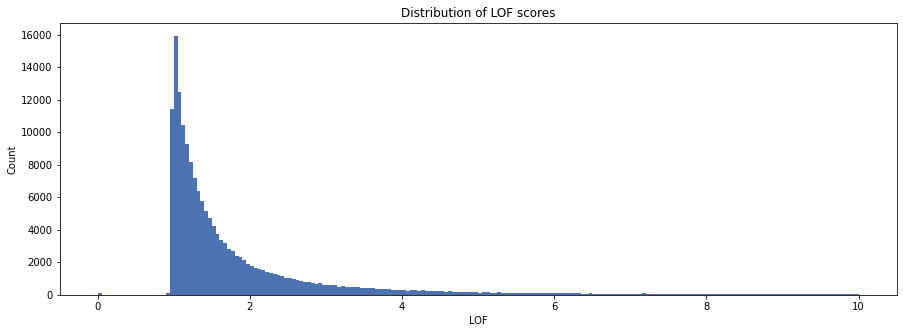

In [10]:
plt.hist(LOFs, bins=200, range=(0, 10))
plt.title('Distribution of LOF scores')
plt.xlabel('LOF')
plt.ylabel('Count');

In [11]:
def plot_LOF(start, step):
    cases=dict()
    for q in np.arange(start, 1, step):
        crtitical_val=np.quantile(LOFs, q)
        n_cases=LOFs[LOFs>=crtitical_val].shape[0]
        cases[q] = n_cases
    plt.plot(cases.keys(), cases.values())
    plt.title('LOF quantiles')
    plt.xlabel('Quantile')
    plt.ylabel('Number of observations exceeding quantile')

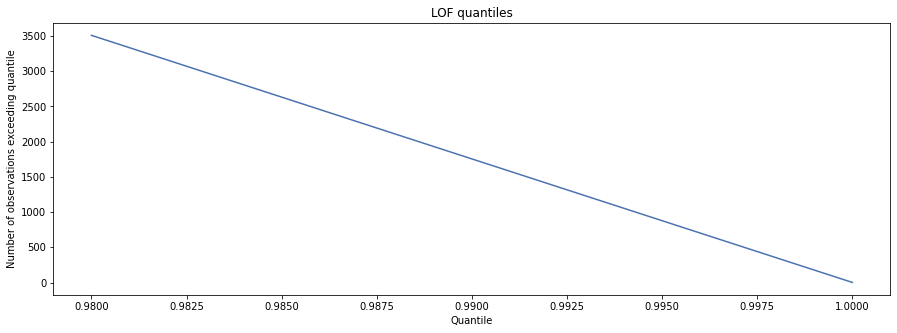

In [12]:
plot_LOF(0.98, 0.005)

In [17]:
LOF_thresh=np.quantile(LOFs, 0.9975)
lv1_df=mark_outliers(lv1_df, LOF_thresh)
lv2_df=mark_outliers(lv2_df, LOF_thresh)
lv3_df=mark_outliers(lv3_df, LOF_thresh)
lv4_df=mark_outliers(lv4_df, LOF_thresh)
lv5_df=mark_outliers(lv5_df, LOF_thresh)
lv6_df=mark_outliers(lv6_df, LOF_thresh)
lv7_df=mark_outliers(lv7_df, LOF_thresh)
lv8_df=mark_outliers(lv8_df, LOF_thresh)
lv9_df=mark_outliers(lv9_df, LOF_thresh)
lv10_df=mark_outliers(lv10_df, LOF_thresh)
print('Threshold is {}'.format(round(LOF_thresh, 2)))

Threshold is 2064.03


In [131]:
num_LOF.append(lv10_df[lv10_df['outlier']==1].loc[:, 'LOF'].median())

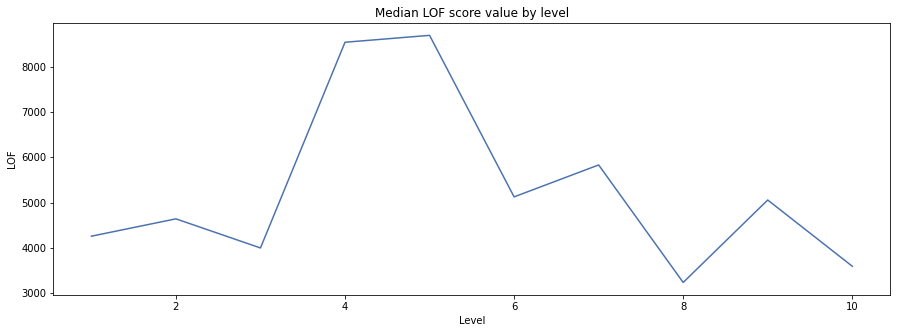

In [134]:
plt.plot(range(1, 11), num_LOF)
plt.title('Median LOF score value by level')
plt.xlabel('Level')
plt.ylabel('LOF');

In [35]:
lv10_df.groupby('outlier').median().round(2)

ask_price  ask_price_grad  ask_volat  bid_price  bid_price_grad  \
outlier                                                                    
0          13497.0             0.0        0.0   13489.99             0.0   
1          13553.0             0.0        0.0   13551.00             0.0   

         bid_volat  imbalance  spread      LOF   ask_dwt   bid_dwt  \
outlier                                                              
0              0.0      -0.01    0.06     1.43  13497.31  13489.76   
1              0.0       0.50    0.02  3593.22  13553.02  13551.00   

         ask_dwt_grad  bid_dwt_grad  
outlier                              
0               -0.01          0.04  
1               -0.01          0.00

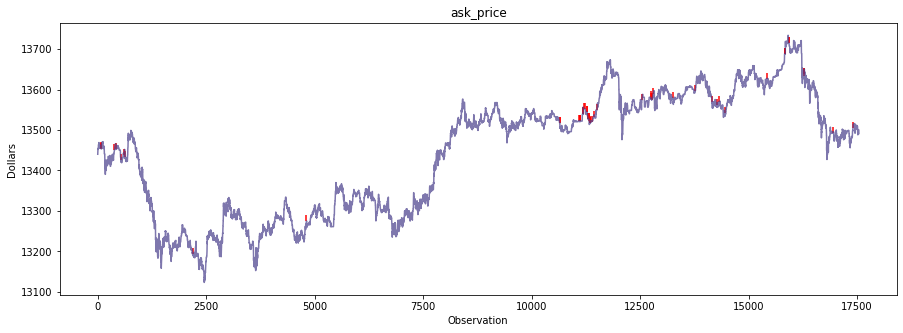

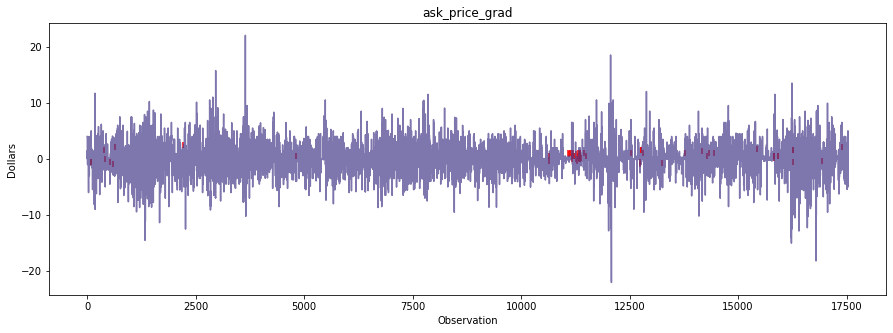

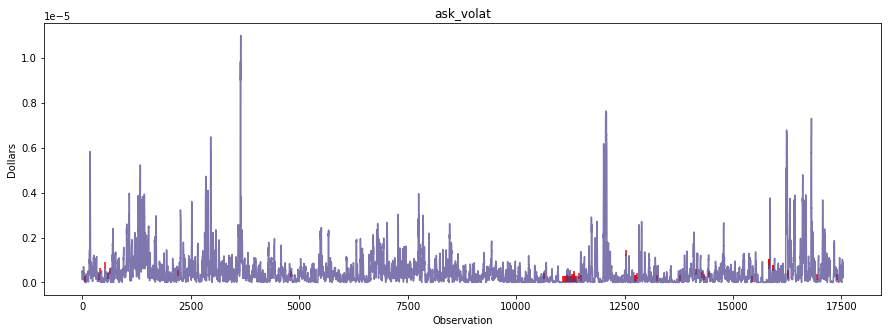

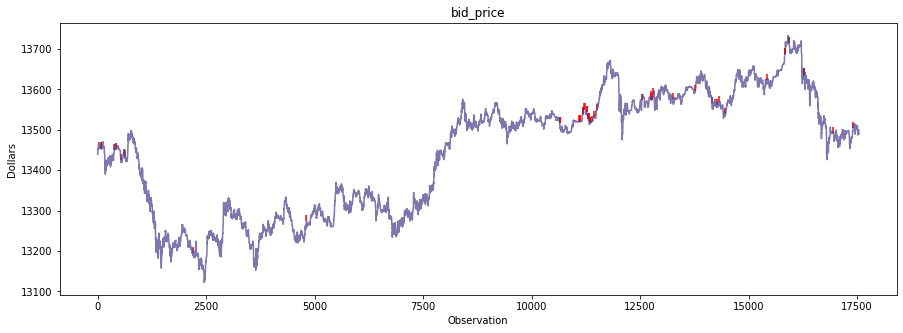

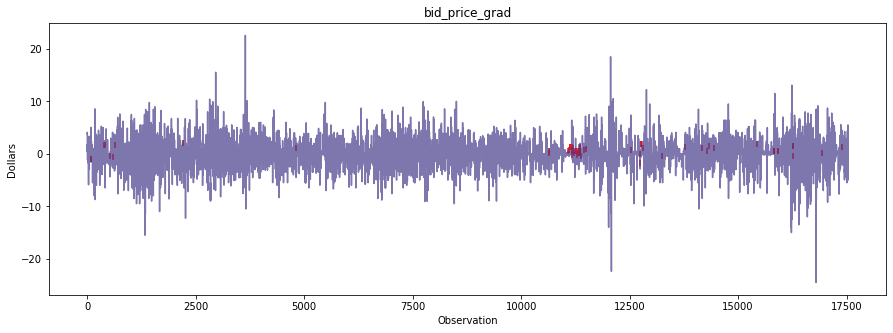

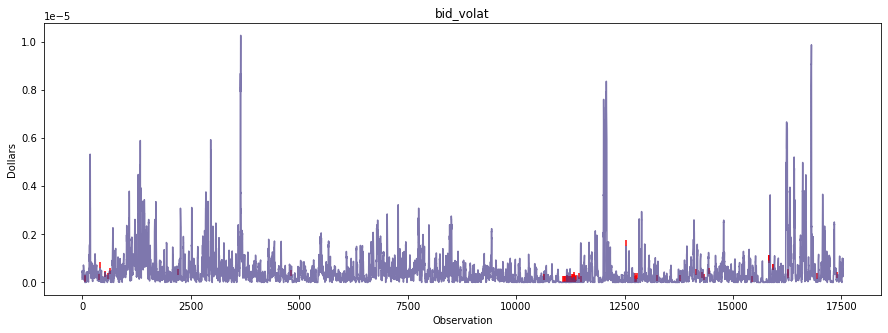

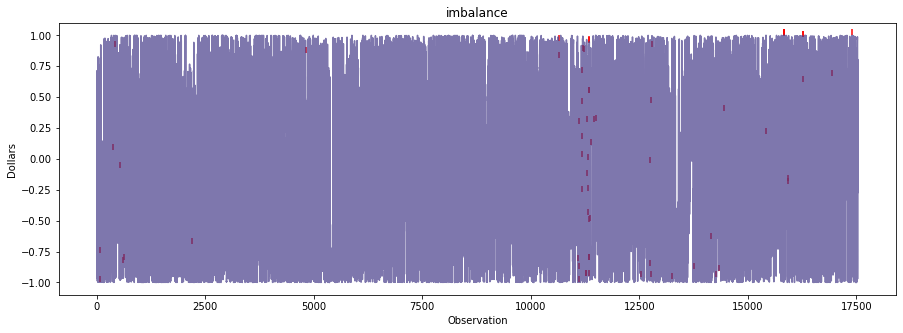

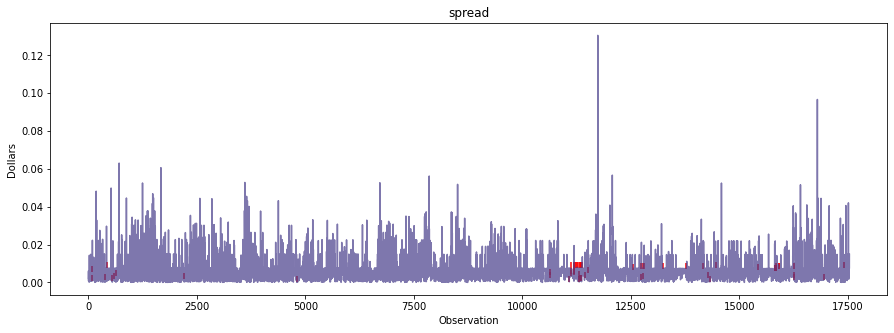

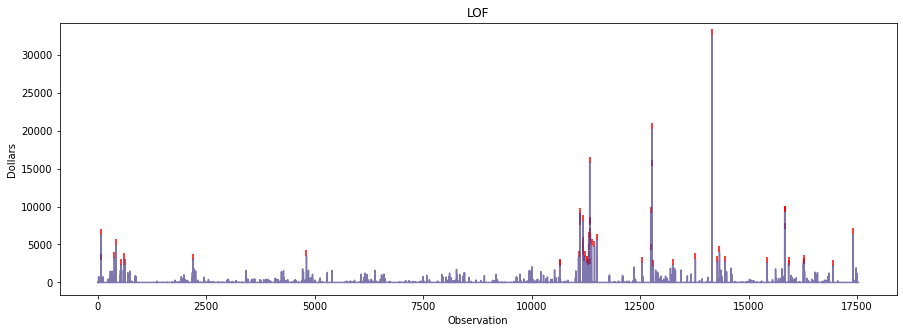

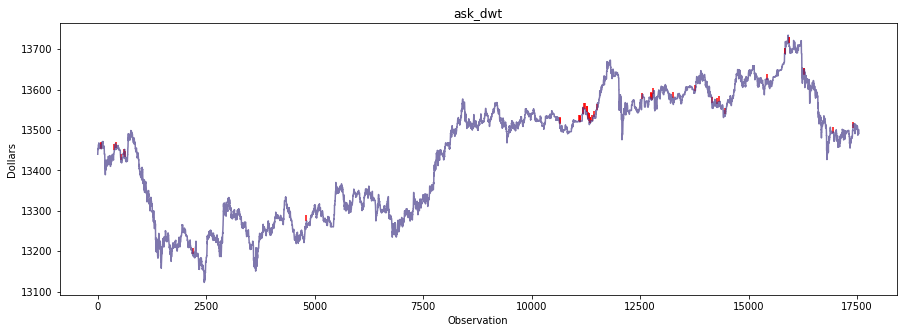

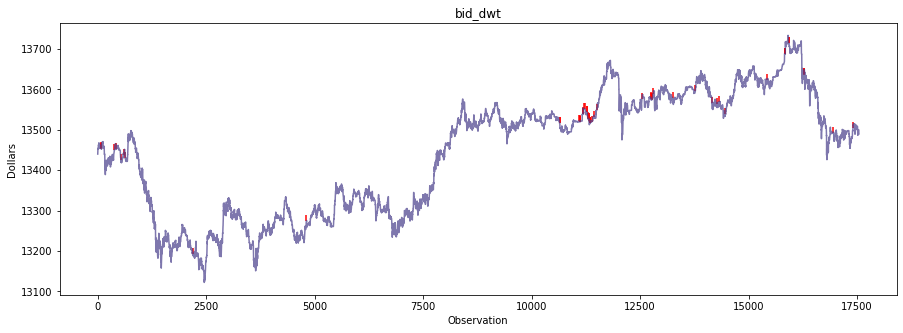

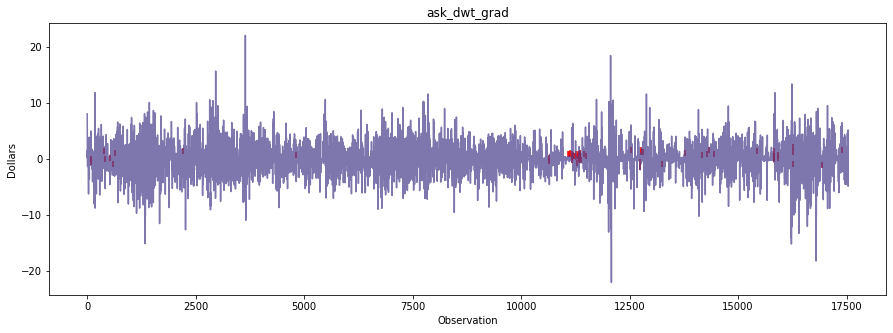

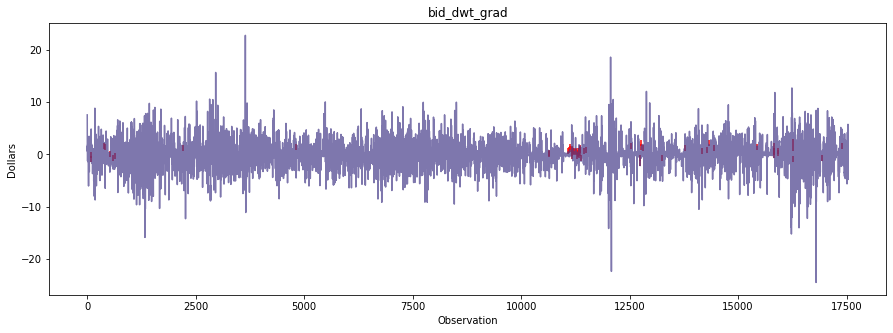

In [22]:
df_plot = lv1_df
for col_name in df_plot.columns[:-1]:
    plt.figure()
    plt.plot(df_plot.index, df_plot[col_name], alpha = 0.7, c = 'darkslateblue')
    plt.title(col_name)
    plt.xlabel('Observation')
    plt.ylabel('Dollars')
    plt.scatter(df_plot[df_plot['outlier']==1].index, df_plot[df_plot['outlier']==1][col_name], c='red', marker=2);

Index(['ask_price', 'ask_price_grad', 'ask_volat', 'bid_price',
       'bid_price_grad', 'bid_volat', 'imbalance', 'spread', 'LOF', 'ask_dwt',
       'bid_dwt', 'ask_dwt_grad', 'bid_dwt_grad'],
      dtype='object')

In [166]:
#for class_ in ['class1', 'class2', 'class3']:
plot_class_graph('bid_price', 'outlier', 'Dollars', lv1_df)

In [101]:
def plot_3D(df, label):
    X = df.drop(columns=['LOF', 'outlier'])
    kpca_3d = KernelPCA(n_components = 3, kernel='linear', gamma=0) 
    kpca_3d_df = pd.DataFrame(kpca_3d.fit_transform(X))
    kpca_3d_df.columns = ['PC1', 'PC2', 'PC3']
    kpca_3d_df['outlier'] = lv1_df[label]
    fig_3D = px.scatter_3d(kpca_3d_df, x='PC1', y='PC2', z='PC3',
                color='outlier')
    fig_3D.show()

In [102]:
plot_3D(lv1_df, 'outlier')

In [167]:
def plot_2D(df, label):
        X = df.drop(columns=['LOF', 'outlier'])
        kpca_2d = KernelPCA(n_components = 2, kernel='linear')
        kpca_2d_df = pd.DataFrame(kpca_2d.fit_transform(X))
        kpca_2d_df.columns = ['PC1', 'PC2']
        kpca_2d_df['outlier'] = lv1_df[label]
        fig_2D = px.scatter(kpca_2d_df, x='PC1', y='PC2', color='outlier')
        fig_2D.show()

In [168]:
plot_2D(lv1_df, 'outlier')

In [108]:
lv1_df.groupby('outlier').mean()

ask_price  ask_price_grad     ask_volat    bid_price  \
outlier                                                            
0        13443.896102        0.003031  5.102147e-07  13443.04387   
1        13538.754939       -0.021531  2.293991e-07  13538.11727   

         bid_price_grad     bid_volat  imbalance   spread          LOF  \
outlier                                                                  
0              0.002842  5.050524e-07  -0.115342  0.00634    16.159870   
1             -0.008038  2.489392e-07   0.056668  0.00470  5061.543276   

              ask_dwt       bid_dwt  ask_dwt_grad  bid_dwt_grad  
outlier                                                          
0        13443.895857  13443.044059      0.003328      0.003204  
1        13538.806967  13538.082758     -0.031212     -0.037319

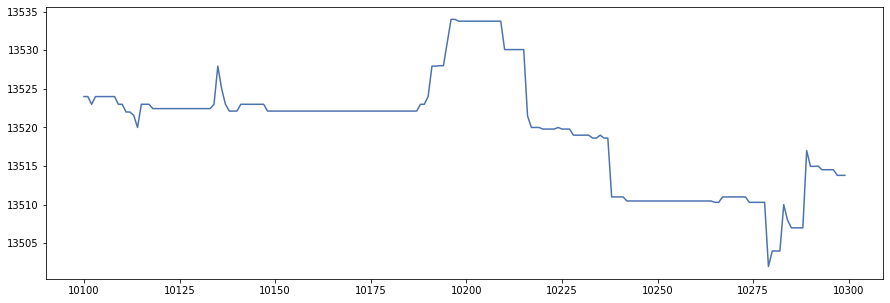

In [171]:
plt.plot(lv1_df.index[10100:10300], lv1_df['ask_price'][10100:10300])